## Contents:
- 1) [Feature Engineering](#Feature-Engineering)
     - [Combine Train/Test Data](#Combine-Data)
     - [Features](#Create-Features)
     - [Split Train/Test Data](#Split-the-data-back-to-train-and-test)
- 2) [Model Preparation](#Model-Preparation)
     - [Lasso Regression](#Overfit-Linear-Regression-and-Lasso-Regression)
     - [Linear Regression](#Linear-Regression-using-selected-features-identified-by-EDA-and-Lasso)
- 3) [Modeling](#Modeling)
    - [Baseline/Null Model](#Baseline/Null-Model)
    - [Model 1: Linear Regression Overfit](#Model-1:-Linear-Regression-Overfit)
    - [Model 2: Lasso Regression](#Model-2:-Lasso-Regression)
    - [Model 3: Linear Regression using selected features](#Model-3:-Linear-Regression-using-selected-features)
- 4) [Model Selection](#Model-Selection)
- 5) [Calculate Root Mean Squared Error](#RMSE)
- 6) [Conclusions and Recommendations](#Conclusions-and-Recommendations)
- 7) [References](#References)
- 8) [Kaggle Submission Screenshot](#Kaggle-Submission-Screenshot)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor

## Feature Engineering
[back to top](#Contents:)

### Feature engineering on combined data (train and test)

In [2]:
housing = pd.read_csv("../datasets/train_clean.csv") 
test = pd.read_csv("../datasets/test_clean.csv")
pd.set_option('display.max_columns',None)

In [3]:
housing.shape

(2051, 77)

In [4]:
test.shape

(878, 76)

## Combine Data
[back to top](#Contents:)
### Train and Test Data combine

In [5]:
# https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data

train_index_marker = len(housing) # use this index marker to split the train and test data at later stage

combined = pd.concat(objs=[housing, test], axis = 0)
combined.head(3)

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0
1,1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0
2,2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0


In [6]:
combined.drop(columns='Unnamed: 0',inplace=True) # drop unnamed column

In [7]:
combined.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0


In [8]:
combined.shape

(2929, 76)

## Create Features
[back to top](#Contents:)

### Analyse the columns to merge them and make more meaningful value easy to read.

### Total number of baths per home

In [9]:
# Add full bath and half bath
combined['total_baths'] = combined['full_bath'] + combined['bsmt_full_bath'] + 0.5 * (combined['half_bath'] + combined['bsmt_half_bath'])

In [10]:
combined['total_baths'].value_counts()

2.000000    911
2.500000    560
1.000000    442
3.000000    378
1.500000    293
3.500000    288
4.000000     31
4.500000     16
7.000000      3
5.000000      3
6.000000      2
1.459248      1
3.959248      1
Name: total_baths, dtype: int64

In [11]:
# As we have combined total baths for the house we will drop the 4 col(full_bath,half_bath,bsmt_full_bath,bsmt_half_bath)
combined.drop(columns=['full_bath','bsmt_full_bath','half_bath','bsmt_half_bath'], inplace=True)

In [12]:
combined.shape

(2929, 73)

## Total Square feet (livable)

In [13]:
combined.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0


In [14]:
# Add BsmtFinSF1,2: Type 1,2 finished square feet and GrLivArea: Above grade (ground) living area square feet
combined['total_livable_sf'] = combined['bsmtfin_sf_1'] + combined['bsmtfin_sf_2'] + combined['gr_liv_area']

In [15]:
# Drop all the 3 columns bsmtfin_sf_1, bsmtfin_sf_2 and gr_liv_area
combined.drop(columns=['bsmtfin_sf_1','bsmtfin_sf_2','gr_liv_area'], inplace=True)

In [16]:
combined.shape

(2929, 71)

In [17]:
combined.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths,total_livable_sf
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5,2012.0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5,2759.0
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0,1788.0
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5,1444.0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0,1445.0


## Neighbourhood

In [18]:
combined['neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    193
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

## In our EDA for Average Sale Price by Neighborhood, I noticed about three clusters of neighborhoods with sale prices that were in a similar range. To eliminate adding a dummy variable for each individual neighborhood, I will create two dummy variables to encode inclusion in these clusters.
![](../images/neighborhood.png)

In [19]:
grp_1 = ['StoneBr', 'NridgeHt', 'Veenker', 'NoRidge', 'GrnHill']
grp_2 = ['SawyerW', 'CollgCr', 'Somerst', 'Gilbert', 'Crawfor', 'NAmes', 'ClearCr', 'Blmngtn', 'Greens']

combined['neighborhoods_1'] = combined['neighborhood'].map(lambda name: 1 if name in grp_1 else 0)
combined['neighborhoods_2'] = combined['neighborhood'].map(lambda name: 1 if name in grp_2 else 0)

In [20]:
combined.drop(columns = 'neighborhood', inplace = True)

In [21]:
combined.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2
0,109,533352170,60,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5,2012.0,0,0
1,544,531379050,60,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5,2759.0,0,1
2,153,535304180,20,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0,1788.0,0,1
3,318,916386060,60,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5,1444.0,0,0
4,255,906425045,50,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0,1445.0,0,1


## MS Subclass

![](../images/subclass.png)

In [22]:
## From the histogram of subclass in EDA three subclass catch my attention i.e subclass 20, 60 and 120 with distinguished features.
## Will featured engineer these subclass in our model.

combined['subclass20'] = combined['ms_subclass'].map(lambda subclass: 1 if subclass == 20 else 0)
combined['subclass60'] = combined['ms_subclass'].map(lambda subclass: 1 if subclass == 60 else 0)
combined['subclass120'] = combined['ms_subclass'].map(lambda subclass: 1 if subclass == 120 else 0)


In [23]:
combined.drop(columns = 'ms_subclass', inplace = True)

In [24]:
combined.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120
0,109,533352170,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5,2012.0,0,0,0,1,0
1,544,531379050,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5,2759.0,0,1,0,1,0
2,153,535304180,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0,1788.0,0,1,1,0,0
3,318,916386060,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5,1444.0,0,0,0,1,0
4,255,906425045,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0,1445.0,0,1,0,0,0


In [25]:
combined.shape

(2929, 74)

## Garage Features

### As the correlation of garage area and garage car with saleprice is high we will featured engineer these two features.
![](../images/garage.png)

In [26]:
combined['garage'] = combined['garage_area'] * combined['garage_cars']

In [27]:
combined.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage
0,109,533352170,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5,2012.0,0,0,0,1,0,950.0
1,544,531379050,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5,2759.0,0,1,0,1,0,1118.0
2,153,535304180,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0,1788.0,0,1,1,0,0,246.0
3,318,916386060,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5,1444.0,0,0,0,1,0,800.0
4,255,906425045,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0,1445.0,0,1,0,0,0,968.0


In [28]:
combined.shape

(2929, 75)

## Conditions (Proximity to main road or railroad)

#### Property is close to off-site feature i.e PosN and PosA
#### PosN Near positive off-site feature--park, greenbelt, etc.
#### PosA Adjacent to postive off-site feature

In [29]:
combined['near_offsite'] = combined['condition_1'].map(lambda x: 1 if x in ['PosN', 'PosA'] else 0)

#### Artery Adjacent to arterial street
#### Feedr Adjacent to feeder street

In [30]:
combined['near_busy_st'] = combined['condition_1'].map(lambda x: 1 if x in ['Artery', 'Feedr'] else 0)

In [31]:
combined.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st
0,109,533352170,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0
1,544,531379050,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0
2,153,535304180,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0
3,318,916386060,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0
4,255,906425045,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0


In [32]:
combined.drop(columns = 'condition_1', inplace = True)

In [33]:
combined.shape

(2929, 76)

## Masonry veneer type

#### Stone Masonry veneer type tends to sell more.
![](../images/mas_vnr.png)

In [34]:
combined['stone_veneer'] = combined['mas_vnr_type'].map(lambda x: 1 if x == 'Stone' else 0)

In [35]:
combined.drop(columns = 'mas_vnr_type', inplace = True)

In [36]:
combined.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer
0,109,533352170,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,WD,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0
1,544,531379050,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,WD,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0
2,153,535304180,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,WD,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0
3,318,916386060,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,WD,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0
4,255,906425045,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,WD,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0


In [37]:
combined.shape

(2929, 76)

## Type of Sale 
#### (New homes sold for higher price so we will create dummy variable)

In [38]:
combined['new_home'] = combined['sale_type'].map(lambda x: 1 if x == 'New' else 0)

### We will take a feature with less sale too i.e COD Court Officer Deed/Estate 

In [39]:
combined['estate'] = combined['sale_type'].map(lambda x: 1 if x == 'COD' else 0)

In [40]:
combined.drop(columns = 'sale_type', inplace = True)

## Basement with living quarters

### GLQ Good Living Quarters tends to have high sale price.
![](../images/basement_glq.png)

In [41]:
combined['good_basement'] = combined['bsmtfin_type_1'].map(lambda x: 1 if x == 'GLQ' else 0)

In [42]:
combined.drop(columns = 'bsmtfin_type_1', inplace = True)

In [43]:
combined.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement
0,109,533352170,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,Gd,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1
1,544,531379050,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1
2,153,535304180,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,Gd,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0,0,0,1
3,318,916386060,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,TA,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0,0,0,0
4,255,906425045,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,TA,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0,0,0,0


## Kitchens

### Homes with excellent kitchens tends to have high sale price.
![](../images/kitchen.png)

In [44]:
combined['kitchen_cond'] = combined['kitchen_qual'].map(lambda x: 1 if x == 'Ex' else 0)

In [45]:
combined.drop(columns = 'kitchen_qual', inplace = True)

In [46]:
combined.head()

,id,pid,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond
0,109,533352170,RL,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0
1,544,531379050,RL,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0
2,153,535304180,RL,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0,0,0,1,0
3,318,916386060,RL,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0,0,0,0,0
4,255,906425045,RL,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0,0,0,0,0


## Zoning

### Cluster the top 3 zones:
### 1)  RL Residential Low Density
### 2) FV Floating Village Residential
### 3) RH Residential High Density
![](../images/zones.png)

In [47]:
combined['top_3_zones'] = combined['ms_zoning'].map(lambda x: 1 if x in ['FV', 'RL', 'RH'] else 0)

In [48]:
combined.drop(columns = 'ms_zoning', inplace = True)

In [49]:
combined.head()

,id,pid,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond,top_3_zones
0,109,533352170,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0,1
1,544,531379050,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0,1
2,153,535304180,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0,0,0,1,0,1
3,318,916386060,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0,0,0,0,0,1
4,255,906425045,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0,0,0,0,0,1


In [99]:
combined.dtypes

id                    int64
pid                   int64
lot_frontage        float64
lot_area              int64
street               object
lot_shape            object
land_contour         object
utilities            object
lot_config           object
land_slope           object
condition_2          object
bldg_type            object
house_style          object
overall_qual          int64
overall_cond          int64
year_built            int64
year_remod/add        int64
roof_style           object
roof_matl            object
exterior_1st         object
exterior_2nd         object
mas_vnr_area        float64
exter_qual           object
exter_cond           object
foundation           object
bsmt_qual            object
bsmt_cond            object
bsmt_exposure        object
bsmtfin_type_2       object
bsmt_unf_sf         float64
total_bsmt_sf       float64
heating              object
heating_qc           object
central_air          object
electrical           object
1st_flr_sf          

## Create Dummies

### We will create a dummies of categorical data for Lasso Regressoion model.

In [50]:
categorical_var = combined.select_dtypes(exclude=['number'])

In [51]:
categorical_var.columns

Index(['street', 'lot_shape', 'land_contour', 'utilities', 'lot_config',
       'land_slope', 'condition_2', 'bldg_type', 'house_style', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_2', 'heating', 'heating_qc', 'central_air', 'electrical',
       'functional', 'fireplace_qu', 'garage_type', 'garage_finish',
       'garage_qual', 'garage_cond', 'paved_drive', 'mo_sold'],
      dtype='object')

In [52]:
dummy_list_1 = categorical_var.columns.tolist()

In [53]:
# Create Dummies for Lasso Regression.
ls_dummies = pd.get_dummies(data = combined , columns = dummy_list_1 , drop_first=True)

In [54]:
ls_dummies.head()

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond,top_3_zones,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,fireplace_qu_Fa,fireplace_qu_Gd,fireplace_qu_Po,fireplace_qu_TA,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12,mo_sold_April,mo_sold_August,mo_sold_December,mo_sold_February,mo_sold_January,mo_sold_July,mo_sold_June,mo_sold_March,mo_sold_May,mo_sold_November,mo_sold_October,mo_sold_September
0,109,533352170,69.0552,13517,6,8,1976,2005,289.0,192.0,725.0,725,754,0,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,544,531379050,43.0000,11492,7,5,1996,1997,132.0,276.0,913.0,913,1209,0,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0

In [55]:
ls_dummies.shape

(2929, 214)

### Linear Regression on selected features based on EDA 

In [56]:
combined.head()

,id,pid,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond,top_3_zones
0,109,533352170,69.0552,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,Gd,TA,CBlock,TA,TA,No,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,6,Typ,0,Gd,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,March,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0,1
1,544,531379050,43.0000,11492,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,Gd,TA,PConc,Gd,TA,No,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,0,April,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0,1
2,153,535304180,68.0000,7922,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,Gd,CBlock,TA,TA,No,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,5,Typ,0,Gd,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,0,January,2010,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0,0,0,1,0,1
3,318,916386060,73.0000,9802,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,Gd,TA,No,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,7,Typ,0,Gd,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,0,April,2010,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0,0,0,0,0,1
4,255,906425045,82.0000,14235,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,TA,PConc,Fa,Gd,No,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,6,Typ,0,Gd,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,0,March,2010,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0,0,0,0,0,1


In [57]:
dummy_list_2 = ['street','land_contour','bldg_type','garage_type','exter_qual','paved_drive']

In [58]:
lr_dummies = pd.get_dummies(data=combined, columns=dummy_list_2,drop_first=True)

In [59]:
lr_dummies.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,lot_config,land_slope,condition_2,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond,top_3_zones,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,paved_drive_P,paved_drive_Y
0,109,533352170,69.0552,13517,IR1,AllPub,CulDSac,Gtl,Norm,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,TA,CBlock,TA,TA,No,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,6,Typ,0,Gd,RFn,2.0,475.0,TA,TA,0,44,0,0,0,0,0,March,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,544,531379050,43.0000,11492,IR1,AllPub,CulDSac,Gtl,Norm,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,TA,PConc,Gd,TA,No,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,8,Typ,1,TA,RFn,2.0,559.0,TA,TA,0,74,0,0,0,0,0,April,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,153,535304180,68.0000,7922,Reg,AllPub,Inside,Gtl,Norm,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,CBlock,TA,TA,No,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,5,Typ,0,Gd,Unf,1.0,246.0,TA,TA,0,52,0,0,0,0,0,January,2010,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,318,916386060,73.0000,9802,Reg,AllPub,Inside,Gtl,Norm,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,PConc,Gd,TA,No,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,7,Typ,0,Gd,Fin,2.0,400.0,TA,TA,100,0,0,0,0,0,0,April,2010,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,255,906425045,82.0000,14235,IR1,AllPub,Inside,Gtl,Norm,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,PConc,Fa,Gd,No,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,6,Typ,0,Gd,Unf,2.0,484.0,TA,TA,0,59,0,0,0,0,0,March,2010,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


## Split the data back to train and test
[back to top](#Contents:)

## Data to be used for Lasso Regression (Train/Test Data)

### Train data

In [60]:
# Using our train_index_marker we will split the data by indexing it.
train_ls = ls_dummies[:train_index_marker]

### Test Data

In [61]:
test_ls = ls_dummies[train_index_marker:]

In [62]:
train_ls.head()

,id,pid,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond,top_3_zones,street_Pave,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,land_contour_HLS,land_contour_Low,land_contour_Lvl,utilities_NoSeWa,utilities_NoSewr,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,land_slope_Mod,land_slope_Sev,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_CompShg,roof_matl_Membran,roof_matl_Metal,roof_matl_Roll,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_PreCast,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Other,exterior_2nd_Plywood,exterior_2nd_PreCast,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,exter_cond_Fa,exter_cond_Gd,exter_cond_Po,exter_cond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,central_air_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sal,functional_Sev,functional_Typ,fireplace_qu_Fa,fireplace_qu_Gd,fireplace_qu_Po,fireplace_qu_TA,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_finish_RFn,garage_finish_Unf,garage_qual_Fa,garage_qual_Gd,garage_qual_Po,garage_qual_TA,garage_cond_Fa,garage_cond_Gd,garage_cond_Po,garage_cond_TA,paved_drive_P,paved_drive_Y,mo_sold_2,mo_sold_3,mo_sold_4,mo_sold_5,mo_sold_6,mo_sold_7,mo_sold_8,mo_sold_9,mo_sold_10,mo_sold_11,mo_sold_12,mo_sold_April,mo_sold_August,mo_sold_December,mo_sold_February,mo_sold_January,mo_sold_July,mo_sold_June,mo_sold_March,mo_sold_May,mo_sold_November,mo_sold_October,mo_sold_September
0,109,533352170,69.0552,13517,6,8,1976,2005,289.0,192.0,725.0,725,754,0,3,1,6,0,2.0,475.0,0,44,0,0,0,0,0,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,544,531379050,43.0000,11492,7,5,1996,1997,132.0,276.0,913.0,913,1209,0,4,1,8,1,2.0,559.0,0,74,0,0,0,0,0,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0

In [63]:
train_ls.shape

(2051, 214)

In [64]:
test_ls.shape

(878, 214)

## Data to be used for Linear Regression (Train/Test Data)

### Train Data

In [65]:
# Using our train_index_marker we will split the data by indexing it.
train_lr = lr_dummies[:train_index_marker]

### Test Data

In [66]:
test_lr = lr_dummies[train_index_marker:]

In [67]:
train_lr.shape

(2051, 89)

In [68]:
test_lr.shape

(878, 89)

## Model Preparation
[back to top](#Contents:)

### Overfit Linear Regression and Lasso Regression

In [69]:
X_ls = train_ls.drop(columns=['saleprice','top_3_zones']) # Drop top_3_zones as it was created after Lasso
y_ls = train_ls['saleprice']

### Train Test Split

In [70]:
X_train_ls,X_test_ls,y_train_ls,y_test_ls = train_test_split(X_ls,y_ls,test_size=0.2,random_state = 1234567)

In [71]:
X_holdout_ls = test_ls.drop(columns = ['saleprice', 'top_3_zones'])

## Linear Regression using selected features identified by EDA and Lasso

In [72]:
train_lr.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,lot_config,land_slope,condition_2,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_area,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_baths,total_livable_sf,neighborhoods_1,neighborhoods_2,subclass20,subclass60,subclass120,garage,near_offsite,near_busy_st,stone_veneer,new_home,estate,good_basement,kitchen_cond,top_3_zones,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,paved_drive_P,paved_drive_Y
0,109,533352170,69.0552,13517,IR1,AllPub,CulDSac,Gtl,Norm,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,289.0,TA,CBlock,TA,TA,No,Unf,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,3,1,6,Typ,0,Gd,RFn,2.0,475.0,TA,TA,0,44,0,0,0,0,0,March,2010,130500.0,2.5,2012.0,0,0,0,1,0,950.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,544,531379050,43.0000,11492,IR1,AllPub,CulDSac,Gtl,Norm,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,132.0,TA,PConc,Gd,TA,No,Unf,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,4,1,8,Typ,1,TA,RFn,2.0,559.0,TA,TA,0,74,0,0,0,0,0,April,2009,220000.0,3.5,2759.0,0,1,0,1,0,1118.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2,153,535304180,68.0000,7922,Reg,AllPub,Inside,Gtl,Norm,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,CBlock,TA,TA,No,Unf,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,3,1,5,Typ,0,Gd,Unf,1.0,246.0,TA,TA,0,52,0,0,0,0,0,January,2010,109000.0,2.0,1788.0,0,1,1,0,0,246.0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,318,916386060,73.0000,9802,Reg,AllPub,Inside,Gtl,Norm,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,0.0,TA,PConc,Gd,TA,No,Unf,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,3,1,7,Typ,0,Gd,Fin,2.0,400.0,TA,TA,100,0,0,0,0,0,0,April,2010,174000.0,2.5,1444.0,0,0,0,1,0,800.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
4,255,906425045,82.0000,14235,IR1,AllPub,Inside,Gtl,Norm,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,0.0,TA,PConc,Fa,Gd,No,Unf,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,3,1,6,Typ,0,Gd,Unf,2.0,484.0,TA,TA,0,59,0,0,0,0,0,March,2010,138500.0,2.0,1445.0,0,1,0,0,0,968.0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [73]:
drop_columns = ['id', 'pid', 'utilities', 'lot_config', 'land_slope', 'condition_2', 'house_style', 'roof_style', 'exterior_1st', 'exterior_2nd', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_2', 'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical', 'bedroom_abvgr', 'kitchen_abvgr', 'functional', 'fireplaces', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val', 'saleprice', 'lot_shape','foundation', 'mo_sold', 'low_qual_fin_sf', 'roof_matl']

X_lr = train_lr.drop(columns = drop_columns)
y_lr = np.log(train_lr['saleprice']) # log y to normalize distribution!

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size = 0.2, random_state = 42)

X_holdout_lr = test_lr.drop(columns = drop_columns)

## Modeling
[back to top](#Contents:)

In [74]:
# Function to calculate R2
def R2_scores(model, X_train, y_train, X_test, y_test):
    print(f'The mean cross validation score for this model is {round(cross_val_score(model, X_train, y_train).mean(),4)}.')
    print(f'The training score for this model is {round(model.score(X_train, y_train), 4)}.')
    print(f'The testing score for this model is {round(model.score(X_test, y_test),4)}.')

## Baseline/Null Model

### We will use dummy regressor as baseline to compare with other real regressors and wont be using it to for real problems.

### [Dummy Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html)

In [75]:
dr = DummyRegressor() #instantiate the model

In [76]:
dr.fit(X_train_ls,y_train_ls) #fit the model

DummyRegressor()

### Evaluate R2 Score

In [77]:
# R2 Score using the function defined eariler
R2_scores(dr,X_train_ls,y_train_ls,X_test_ls,y_test_ls)

The mean cross validation score for this model is -0.0044.
The training score for this model is 0.0.
The testing score for this model is -0.0007.


## Observation from dummy regressor: In this scenario, just predicting the mean Sale Price will explain ~0% of the variation in our target. Any model that is able to explain any variation in the target will be a vast improvement.

## Model 1: Linear Regression Overfit

### (precursor to lasso regression) 

In [78]:
lr_precursor = LinearRegression() # Instantiate model

In [79]:
lr_precursor.fit(X_train_ls,y_train_ls) #fit the model

LinearRegression()

In [80]:
# R2 Score using the function defined eariler
R2_scores(lr_precursor,X_train_ls,y_train_ls,X_test_ls,y_test_ls)

The mean cross validation score for this model is 0.8065.
The training score for this model is 0.9377.
The testing score for this model is 0.7588.


### Observation: 1) Model seems to be highly overfit as training and test R2 scores are 0.93 and 0.75 respectively.
### 2) This is before any regiularization techniques applied to model.
### 3) We will use Lasso regularization as the model seems to be overfit.

## Model 2: Lasso Regression

In [81]:
ss = StandardScaler() # Use standard scalar to scale the data.

In [82]:
Z_train = ss.fit_transform(X_train_ls) # Relabeling scaled data as "Z" is common.
Z_test = ss.transform(X_test_ls)
scaled_holdout = ss.transform(X_holdout_ls)


In [83]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')

Z_train shape is: (1640, 212)
Z_test shape is: (411, 212)


In [84]:
# https://chrisalbon.com/code/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/
lasso = Lasso(alpha = 5000, max_iter = 4000) # We increase value of alpha to make more features with coefficient 0
lasso.fit(Z_train, y_train_ls);

In [85]:
# R2 Score using the function defined eariler
R2_scores(lasso, Z_train, y_train_ls, Z_test, y_test_ls) # Evaluate R2 score

print(f'The number of features in this model is : {np.sum(lasso.coef_ != 0)}.')

The mean cross validation score for this model is 0.8257.
The training score for this model is 0.8421.
The testing score for this model is 0.8051.
The number of features in this model is : 19.


In [86]:
# Check the remaining coefficient
# Code from Jose Portilla's Data Science Class on Udemy
lasso_coef = pd.DataFrame(lasso.coef_, X_train_ls.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)

In [87]:
# Check non zero coefficients
lasso_coef[lasso_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False) 

,Coefficient
overall_qual,23993.984634
total_livable_sf,17690.080523
garage,10558.073979
kitchen_cond,8486.455562
1st_flr_sf,5772.448864
year_remod/add,3839.485927
mas_vnr_area,2850.184100
fireplaces,2548.558018
neighborhoods_1,2483.204594
totrms_abvgrd,2266.770424


### Observation: 1) L1 penalty score was set to 5000 to balance bias and variance.
### 2) Number of features were reduced to 19.
### 3) R2_Train shows 84.21% of variation in sale price.
### 4) R2_Test shows 80.51% of variation in sale price.

### Suggestion for improvement: Manually remove features that has assigned 0 coefficients and use LassoCV until model is no longer overfit to training data.

## Model 3: Linear Regression using selected features

In [88]:
lr = LinearRegression() # Instantiate the model

In [89]:
lr.fit(X_train_lr,y_train_lr) #fit the model

LinearRegression()

In [90]:
# R2 Score using the function defined eariler
R2_scores(lr, X_train_lr, y_train_lr, X_test_lr, y_test_lr)

print(f'The number of features in this model is : {np.sum(lr.coef_ != 0)}.')

The mean cross validation score for this model is 0.8451.
The training score for this model is 0.8771.
The testing score for this model is 0.8834.
The number of features in this model is : 48.


### Observation: 1) R2 score is impressive.
### 2) Low variance and low bias.
### 3) As the data is not scaled it provides good interpretability.

### Predictions to holdout data and save as csv for kaggle

In [91]:
# y was logged; Must exponentiate the predictions
lr_preds = np.exp(lr.predict(X_holdout_lr))

In [98]:
preds_cols = pd.Series(lr_preds, name = 'SalePrice')
id_col = test_ls['id']
output = pd.concat([id_col, preds_cols], axis = 1)
output.sort_values('id', inplace = True)
output.sort_values('id', inplace = True)
output.set_index('id', inplace = True)
output.to_csv('../output/final_submission.csv')

## Model Selection
[back to top](#Contents:)

![](../images/table.png)

### As per the above table it shows that Linear Regression model tends to perform best among the ones built.

## RMSE 
### (Calculate Root Mean Squared Error)
[back to top](#Contents:)

In [94]:
y_test = np.exp(y_test_lr) # Convert back to actual (non-log) values
y_pred = np.exp(lr.predict(X_test_lr)) # Convert back to actual (non-log) values
resids = y_test - y_pred

In [95]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'The RMSE is {round(rmse,2)}.')

The RMSE is 22800.19.


### As per RMSE, predictions for Sale price by Linear Regression model is off by about 22,800.19.
### This is like 1/3 of standard deviation of the Sale Price in training data(79,258).

## Compare Actual Saleprice with predicted Sale price

C:\Users\gac808\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


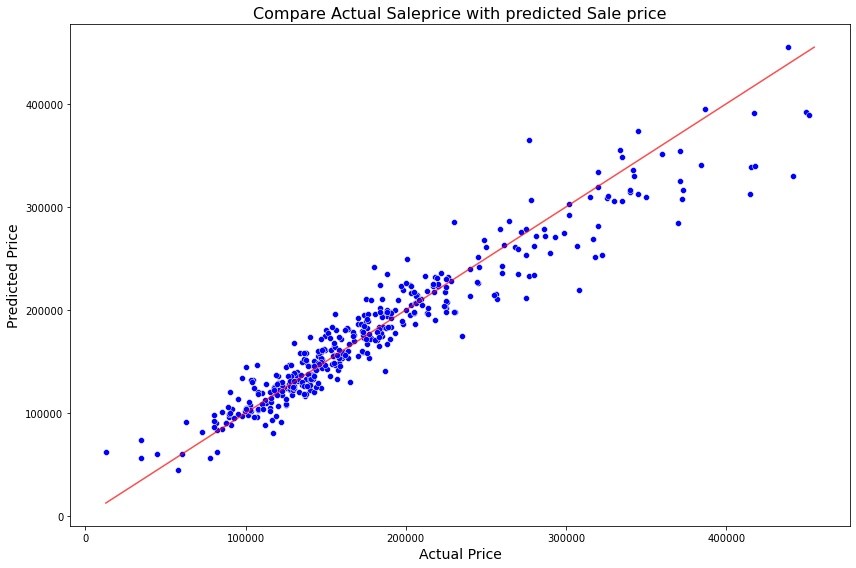

In [96]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = y_test, y = y_pred, color = 'blue')
plt.title('Compare Actual Saleprice with predicted Sale price', fontdict = {'fontsize':16})
maxDist = max(max(y_pred), max(y_test)) 
minDist = min(min(y_pred), min(y_test))
sns.lineplot((minDist, maxDist), (minDist, maxDist), color = 'red', alpha = 0.7)
plt.xlabel('Actual Price', fontdict= {'fontsize':14})
plt.ylabel('Predicted Price', fontdict= {'fontsize':14})
plt.tight_layout();

### Observation: Linear Regression model tends to perform well for predicting price range from around 85K to just over 210k. This could be due to insufficient data availability for the price above and below the range of 85k to 210k. 

## Lets see co-efficient for Linear Regression to help us to draw some conclusions.

In [103]:
# Linear Regression co-efficients
lr_coef = pd.DataFrame(lr.coef_, X_train_lr.columns, columns = ['Coefficient'])
pd.set_option('display.max_rows', None)
lr_coef[lr_coef['Coefficient'] != 0].sort_values('Coefficient', ascending = False) 

,Coefficient
street_Pave,0.159452
land_contour_HLS,0.145579
subclass120,0.109908
paved_drive_Y,0.105538
kitchen_cond,0.086365
garage_type_Basment,0.082693
garage_type_Attchd,0.076386
overall_qual,0.076289
paved_drive_P,0.074139
top_3_zones,0.072290


## Conclusions and Recommendations
[back to top](#Contents:)

### 1) Linear Regression model tends to account for approx 88.34% of the variation in sale price of a property.
### 2) It was able to predict sale price within 22,800.19.
### 3) Upon plotting actual price vs predicted price scatter plot we could see that the model could only predict the price in range of 85k to just over 210k but at both extremes it was lagging in preicting the sale price.
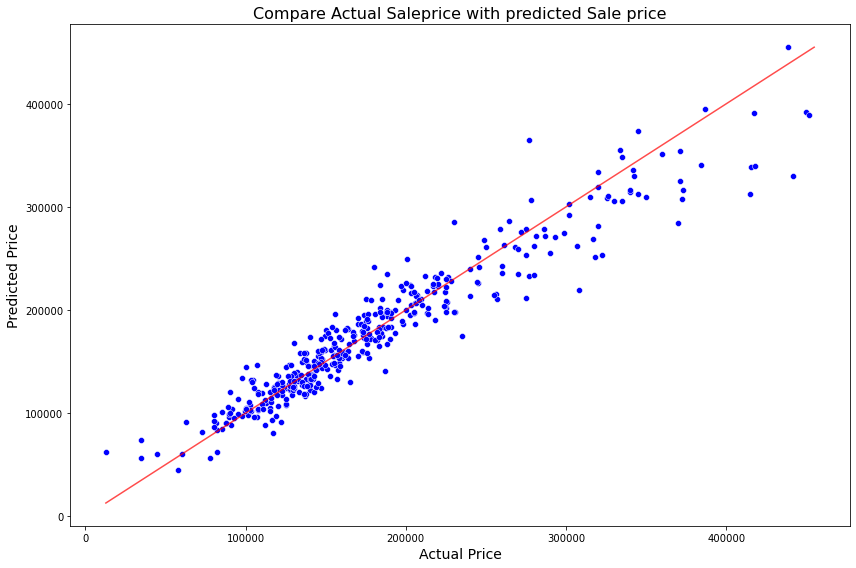
### 4) Having below top 5 features in the house will result in property price increase.
![](../images/lr_Top5.png)
### 5) Having below bottom 5 features in the house will result in property price decrease.
![](../images/lr_bottom5.png)
### 6) Properties located in Stone Brooke, Northridge Heights,Veenker and Green Hill  results in 6.8% increae in price.
![](../images/neighborhood_1.png)

## References
[back to top](#Contents:)
- [Ames Population](https://datausa.io/profile/geo/ames-ia/#about)
- [City of Ames](https://www.cityofames.org/about-ames/about-ames)
- [Real Estate ML](https://unionstreetmedia.com/the-rise-of-machine-learning-in-real-estate/#:~:text=Personalized%20Marketing%20Automation%20%E2%80%93%20machine%20learning,neighborhood%20and%20property%20is%20best)
- [Lasso Regression](https://chrisalbon.com/code/machine_learning/linear_regression/effect_of_alpha_on_lasso_regression/)
- [Krish Naik youtube channel](https://www.youtube.com/channel/UCNU_lfiiWBdtULKOw6X0Dig)
- [Towards Data Science](https://towardsdatascience.com/wrangling-through-dataland-modeling-house-prices-in-ames-iowa-75b9b4086c96)
- [medium.com](https://medium.com/@kamskijohnm2m/ames-housing-price-prediction-complete-ml-project-with-python-2af595a749d6)

## Kaggle Submission Screenshot
![](../images/kaggle.png)